# TP2

In [4]:
import numpy as np
from numba import jit, njit
from PIL import Image

image = Image.open("cat.png")
image_array = np.array(image)


def apply_filter_no_numba(image_array, mask):
    n, m = image_array.shape[:2]
    filtered_image = np.zeros((n-2, m-2), dtype=np.float32)
    for i in range(1, n-1):
        for j in range(1, m-1):
            filtered_image[i-1, j-1] = np.sum(image_array[i-1:i+2, j-1:j+2] * mask)
    return filtered_image


@njit
def apply_filter_njit(image_array, mask):
    n, m = image_array.shape[:2]
    filtered_image = np.zeros((n-2, m-2), dtype=np.float32)
    for i in range(1, n-1):
        for j in range(1, m-1):
            filtered_image[i-1, j-1] = np.sum(image_array[i-1:i+2, j-1:j+2] * mask)
    return filtered_image


@jit(nopython=True)
def apply_filter_with_numba(image_array, mask):
    n, m = image_array.shape[:2]
    filtered_image = np.zeros((n-2, m-2), dtype=np.float32)
    for i in range(1, n-1):
        for j in range(1, m-1):
            filtered_image[i-1, j-1] = np.sum(image_array[i-1:i+2, j-1:j+2] * mask)
    return filtered_image

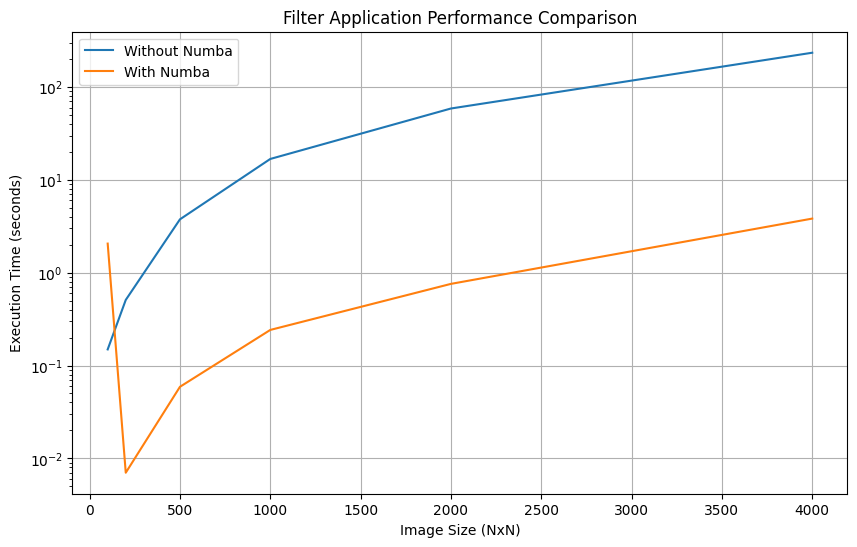

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

mask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])


image_sizes = [100, 200, 500, 1000, 2000, 4000]


timings_no_numba = []
timings_with_numba = []


for size in image_sizes:
    image_array = np.random.rand(size, size).astype(np.float32)
    
    start_time = time.time()
    apply_filter_no_numba(image_array, mask)
    timings_no_numba.append(time.time() - start_time)
    
    start_time = time.time()
    apply_filter_with_numba(image_array, mask)
    timings_with_numba.append(time.time() - start_time)
    

plt.figure(figsize=(10, 6))
plt.plot(image_sizes, timings_no_numba, label='Without Numba')
plt.plot(image_sizes, timings_with_numba, label='With Numba')
plt.xlabel('Image Size (NxN)')
plt.ylabel('Execution Time (seconds)')
plt.title('Filter Application Performance Comparison')
plt.yscale('log')  
plt.legend()
plt.grid(True)
plt.show()